In [ ]:
# Annotated follow-along guide_ Interpret multiple regression results with Python

# multicolinearity

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv("./csv/marketing_sales.csv")
data.head()

,TV,Radio,Social Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328


In [ ]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
# • TV promotional budget (in “Low,” “Medium,” and “High” categories)
# • Social media promotional budget (in millions of dollars)
# • Radio promotional budget (in millions of dollars)
# • Sales (in millions of dollars)
# • Influencer size (in “Mega,” “Macro,” “Micro,” and “Nano” categories)

In [ ]:
import seaborn as sns

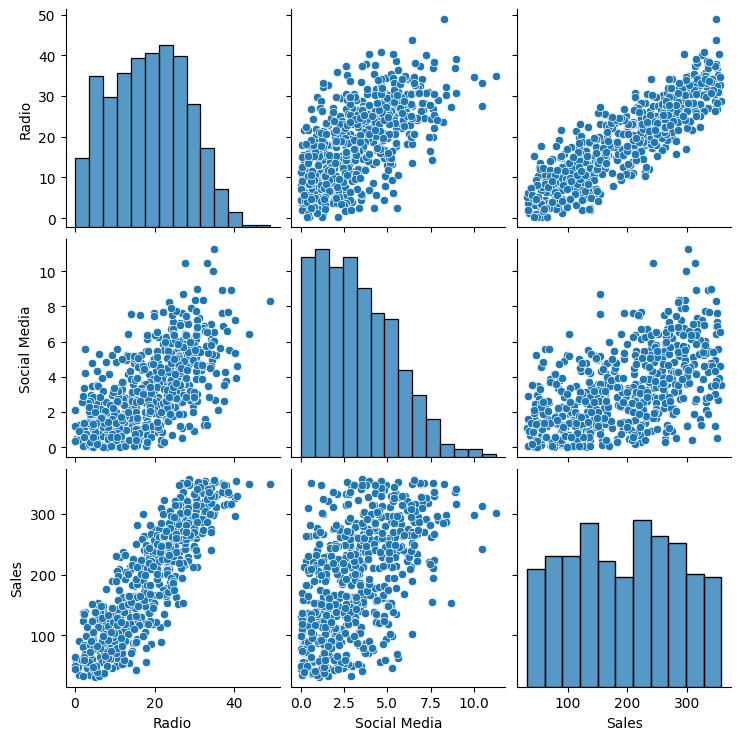

In [ ]:
sns.pairplot(data=data)

In [ ]:
tv_sales = data[["TV", "Sales"]]
tv_sales_mean = tv_sales["Sales"].mean()

In [ ]:
influencer_sales = data[["Influencer", "Sales"]]
influencer_sales_mean = influencer_sales["Sales"].mean()

In [ ]:
tv_sales

,TV,Sales
0,Low,90.054222
1,Medium,222.741668
2,Low,102.774790
3,High,328.239378
4,High,351.807328
...,...,...
567,High,302.887998
568,Medium,232.555023
569,Low,73.888838
570,Low,121.949570


In [ ]:
data.groupby("TV")["Sales"].mean()

TV
High      300.529591
Low        91.646843
Medium    199.023461
Name: Sales, dtype: float64

In [ ]:
data.groupby("Influencer")["Sales"].mean()

Influencer
Macro    205.660047
Mega     180.385096
Micro    198.655080
Nano     190.777766
Name: Sales, dtype: float64

In [ ]:
data.dropna(inplace=True)
data.reset_index(inplace=True, drop=True)

In [ ]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
data.rename(columns={"Social Media": "Social_Media"})

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
...,...,...,...,...,...
564,High,28.210738,4.373466,Micro,302.887998
565,Medium,23.578661,2.856657,Mega,232.555023
566,Low,9.169824,0.067279,Nano,73.888838
567,Low,11.563403,1.727947,Nano,121.949570


In [ ]:
# Define the OLS formula.
# Create an OLS model.
# Fit the model.
# Save the results summary.
# Display the model results.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
data_X = data[["TV", "Radio", "Social_Media", "Influencer"]]
data_y = data[["Sales"]]

KeyError: "['Social_Media'] not in index"

In [ ]:
data.columns

Index(['TV', 'Radio', 'Social Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
data.rename(columns={"Social Media": "Social_Media"}, inplace=True)

In [ ]:
data_X = data[["TV", "Radio", "Social_Media", "Influencer"]]
data_y = data[["Sales"]]

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data_X, data_y, test_size=0.3, random_state=42
)

In [ ]:
data.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

In [ ]:
ols_formula = "Sales ~ Radio + Social_Media + C(TV) + C(Influencer)"

In [ ]:
X_train

,TV,Radio,Social_Media,Influencer
149,Medium,18.957376,2.877555,Macro
124,Medium,13.396217,4.181492,Mega
421,Low,6.326905,1.731505,Macro
195,Low,0.194576,1.235675,Mega
545,Medium,4.246828,1.182700,Micro
...,...,...,...,...
71,High,17.418287,0.483528,Micro
106,High,31.707010,4.365167,Nano
270,High,28.080056,6.062589,Macro
435,High,24.169998,3.535180,Macro


In [ ]:
y_train

,Sales
149,183.484046
124,164.760792
421,78.823500
195,64.571920
545,151.641576
...,...
71,263.548753
106,347.154760
270,322.373949
435,286.030040


In [ ]:
ols_data = pd.concat([X_train, y_train], axis=1)

In [ ]:
ols_data

,TV,Radio,Social_Media,Influencer,Sales
149,Medium,18.957376,2.877555,Macro,183.484046
124,Medium,13.396217,4.181492,Mega,164.760792
421,Low,6.326905,1.731505,Macro,78.823500
195,Low,0.194576,1.235675,Mega,64.571920
545,Medium,4.246828,1.182700,Micro,151.641576
...,...,...,...,...,...
71,High,17.418287,0.483528,Micro,263.548753
106,High,31.707010,4.365167,Nano,347.154760
270,High,28.080056,6.062589,Macro,322.373949
435,High,24.169998,3.535180,Macro,286.030040


In [ ]:
data

,TV,Radio,Social_Media,Influencer,Sales
0,Low,1.218354,1.270444,Micro,90.054222
1,Medium,14.949791,0.274451,Macro,222.741668
2,Low,10.377258,0.061984,Mega,102.774790
3,High,26.469274,7.070945,Micro,328.239378
4,High,36.876302,7.618605,Mega,351.807328
...,...,...,...,...,...
564,High,28.210738,4.373466,Micro,302.887998
565,Medium,23.578661,2.856657,Mega,232.555023
566,Low,9.169824,0.067279,Nano,73.888838
567,Low,11.563403,1.727947,Nano,121.949570


In [ ]:
ols_data.iloc[1]

TV                  Medium
Radio            13.396217
Social_Media      4.181492
Influencer            Mega
Sales           164.760792
Name: 124, dtype: object

In [ ]:
data.iloc[1]

TV                  Medium
Radio            14.949791
Social_Media      0.274451
Influencer           Macro
Sales           222.741668
Name: 1, dtype: object

In [ ]:
from statsmodels.formula.api import ols

OLS = ols(formula=ols_formula, data=ols_data)
model = OLS.fit()

In [ ]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.901
Model:                            OLS   Adj. R-squared:                  0.899
Method:                 Least Squares   F-statistic:                     507.3
Date:                Sun, 22 Sep 2024   Prob (F-statistic):          1.65e-191
Time:                        10:05:53   Log-Likelihood:                -1888.3
No. Observations:                 398   AIC:                             3793.
Df Residuals:                     390   BIC:                             3824.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                213.5284      8.181     26.099      0.000     197.443     229.614
C(TV)[T.Low]            -148.1423      6.087    -24.339      0.000    -160.109    -136.175
C(TV)[T.Medium]          -71.9861      4.299    -16.745      0.000     -80.438     -63.534
C(Influencer)[T.Mega]     -3.0093      4.089     -0.736      0.462     -11.048       5.030
C(Influencer)[T.Micro]     0.7982      4.083      0.195      0.845      -7.230       8.826
C(Influencer)[T.Nano]     -0.1005      4.100     -0.025      0.980      -8.162       7.961
Radio                      3.1708      0.276     11.493      0.000       2.628       3.713
Social_Media              -1.3100      0.824     -1.590      0.113      -2.929       0.309
==============================================================================
Omnibus:                       19.370   Durbin-Watson:                   1.859
Prob(Omnibus):                  0.000   Jarque-Bera (JB):                9.301
Skew:                           0.148   Prob(JB):                      0.00956
Kurtosis:                       2.312   Cond. No.                         159.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""